In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
 train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
# x_train[0]

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
#Configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
#Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [13]:
#Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [14]:
# Setting aside a validation set
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
#Training your model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5291 - acc: 0.7655 - val_loss: 0.4018 - val_acc: 0.8632
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3282 - acc: 0.8941 - val_loss: 0.3146 - val_acc: 0.8854
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2438 - acc: 0.9211 - val_loss: 0.2850 - val_acc: 0.8885
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1972 - acc: 0.9353 - val_loss: 0.2797 - val_acc: 0.8879
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1639 - acc: 0.9462 - val_loss: 0.2862 - val_acc: 0.8838
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1386 - acc: 0.9557 - val_loss: 0.2910 - val_acc: 0.8829
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1198 - acc: 0.9615 - val_loss: 0.2969 - val_acc: 0.8830
Epoch 8/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1028 - a

In [16]:
history_dict = history.history
print(history_dict)
history_dict.keys()

{'loss': [0.5291255712509155, 0.328191876411438, 0.2438003420829773, 0.19715453684329987, 0.16391584277153015, 0.1385893076658249, 0.11978452652692795, 0.10281574726104736, 0.09188717603683472, 0.07600255310535431, 0.06531472504138947, 0.056658126413822174, 0.04846365377306938, 0.041323885321617126, 0.03213806077837944, 0.030297739431262016, 0.022871682420372963, 0.02217860333621502, 0.018537795171141624, 0.014598730020225048], 'acc': [0.7654666900634766, 0.8941333293914795, 0.9210666418075562, 0.9352666735649109, 0.9462000131607056, 0.9557333588600159, 0.9614666700363159, 0.9692666530609131, 0.9735999703407288, 0.9781333208084106, 0.9836666584014893, 0.9860000014305115, 0.98826664686203, 0.9910666942596436, 0.9943333268165588, 0.9940666556358337, 0.9965333342552185, 0.9968666434288025, 0.9972000122070312, 0.998533308506012], 'val_loss': [0.4017774760723114, 0.31462085247039795, 0.28501033782958984, 0.2796526253223419, 0.28615880012512207, 0.29096370935440063, 0.2968611717224121, 0.345

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [17]:
import pandas as pd
pd.DataFrame(history_dict)[:10]

,loss,acc,val_loss,val_acc
0,0.529126,0.765467,0.401777,0.8632
1,0.328192,0.894133,0.314621,0.8854
2,0.243800,0.921067,0.285010,0.8885
3,0.197155,0.935267,0.279653,0.8879
4,0.163916,0.946200,0.286159,0.8838
5,0.138589,0.955733,0.290964,0.8829
6,0.119785,0.961467,0.296861,0.8830
7,0.102816,0.969267,0.345811,0.8710
8,0.091887,0.973600,0.323464,0.8834
9,0.076003,0.978133,0.345791,0.8817


C:\Users\LAB02R~1\AppData\Local\Temp/ipykernel_10928/2034309582.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', label='Validation loss', color=(0.4, 0.6, 1.0, 1))


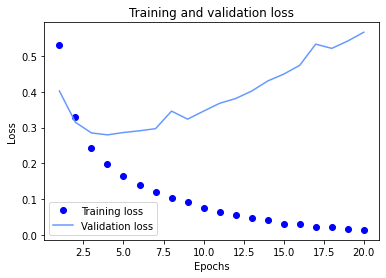

In [18]:
# Plotting to check the difference of Gain and Loss Value 
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss', color=(0.4, 0.6, 1.0, 1))
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

C:\Users\LAB02R~1\AppData\Local\Temp/ipykernel_10928/4058132486.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc_values, 'b', label='Validation acc', color='red')


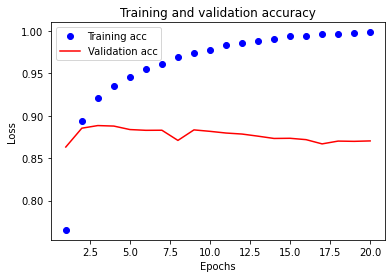

In [19]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
#Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 6ms/step - loss: 0.4652 - accuracy: 0.8075
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2688 - accuracy: 0.9030
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2088 - accuracy: 0.9249
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2877 - accuracy: 0.8842


In [21]:
results

[0.2876785099506378, 0.8841999769210815]

In [23]:
# Done